In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

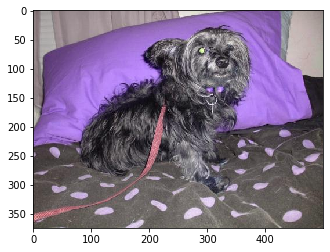

In [2]:
DATADIR = 'C:/Users/xpn381/Documents/data/PetImages'
CATAGORIES = ['Dog', 'Cat']

for cat in CATAGORIES:
    path = os.path.join(DATADIR, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [3]:
img_array.shape #last three is the color dimensions

(375, 500, 3)

# Grayscale:

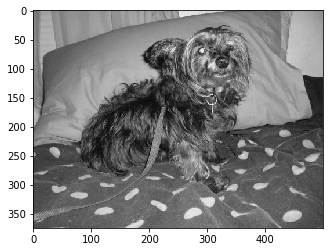

In [4]:
DATADIR = 'C:/Users/xpn381/Documents/data/PetImages'
CATAGORIES = ['Dog', 'Cat']

for cat in CATAGORIES:
    path = os.path.join(DATADIR, cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# one not three col
        
        # alt to GRAYSCALE (0) is IMREAD_COLOR (1) and IMREAD_UNCHANGED (-1)
        # You can also change the format from BRG (cv2) to RGB (standart)
        # img_array cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
print(img_array.shape) # now only one (implicit) color dimension

(375, 500)


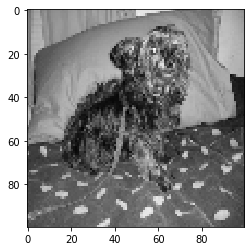

In [6]:
# resizing images
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

# creating the dataset via a function:

In [7]:

def creat_training_data():
    
    training_data = []

    for category in CATAGORIES:
        path = os.path.join(DATADIR, category) # path to cat or dog dir
        class_num = CATAGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# one not three col
                IMG_SIZE = 100
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num]) # list with image and class
            except Exception as e:
                pass #print(e)
            
    return(training_data)

training_data = creat_training_data()

### Checking:

In [8]:
print(len(training_data))

24946


class{training_data[0][1]}


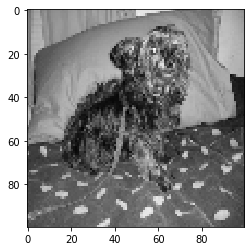

In [9]:
print('class{training_data[0][1]}')
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

### Shuffle the data

In [10]:
random.shuffle(training_data)

### Checking

In [11]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
1
0
1
1
1


# Split in features and target:

In [12]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
# X must be numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # last 1 due to grayscale; 3 for colors
# -1 = 'any number given'

# Pickle features and target

In [13]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

# pickle test:

In [14]:
pickle_in = open('X.pickle','rb')
X_pt = pickle.load(pickle_in)

X_pt.shape
# corrosponds to (-1, IMG_SIZE, IMG_SIZE, 1)

(24946, 100, 100, 1)

In [15]:
pickle_in = open('y.pickle','rb')
y_pt = pickle.load(pickle_in)

len(y_pt)
# just a binary list

24946